In [41]:
!pip install keras
!pip install nltk
!pip install tensorflow
!pip install seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D , Conv2D,MaxPooling2D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import TensorBoard
import nltk 

from nltk.tokenize import sent_tokenize, word_tokenize
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
Name = "Grpah-2300-100"

tensorboard = TensorBoard(log_dir='Logs2/{}'.format(Name))
print(Name)

Grpah-2300-100


2022-03-08 19:18:40.334455: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-08 19:18:40.334560: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-08 19:18:40.334727: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [42]:
# news_data = pd.read_csv("News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# # print a summary of the data in news_data
# print(news_data[1])
# news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# news_data.head(20)


In [43]:
# labels=news_data[1]
# labels.head()     
# print(type(labels))

In [44]:
#news_data[1].value_counts()

In [45]:
# X = news_data[0]
# Y=news_data[1]
# x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
# print(type(x_test))
# print(x_train.shape , y_train.shape)

In [46]:
# x_train

In [47]:
# x_train = x_train.str.replace('\d+', '') # removing all numbers
# x_train


In [48]:
# x_test = x_test.str.replace('\d+', '')
# x_test

In [49]:
#x_train = x_train.str.replace('[^\w\s\]','') # remove all puctuations

In [50]:
#x_train

In [51]:
# x_test = x_test.str.replace('[^\w\s\"]','')
# x_test

In [52]:
!pip install nltk

In [53]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')



In [54]:
# x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# x_train

In [55]:
# x_test = x_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# x_test

In [56]:
# tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)

#print(x_train)





# from sklearn.feature_extraction.text import TfidfVectorizer
# #DataFlair - Initialize a TfidfVectorizer
# tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# #DataFlair - Fit and transform train set, transform test set
# x_train=tfidf_vectorizer.fit_transform(x_train) 
# x_test=tfidf_vectorizer.transform(x_test)

# x_train=x_train.toarray()
# x_test=x_test.toarray()
# print(type(x_train))

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(stop_words='english')

# x_train = cv.fit_transform(x_train).toarray()
# x_test=cv.transform(x_test).toarray()

In [57]:
# vocab_size = len(tfidf_vectorizer.vocabulary_)  
# print(vocab_size)


# vocab_size = len(tokenizer.word_index) + 1  
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index) 
# #     x_train = tokenizer.texts_to_sequences(token)           
#     data.append(token)

# x_train = tokenizer.texts_to_sequences(data) 
# x_test = tokenizer.texts_to_sequences(x_test)


In [58]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()

In [59]:
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# print(x_train.shape , vocab_size)
# print(type(y_test))
# y_train = y_train.astype('float64')
# y_test = y_test.astype('float64')

In [60]:
# Sklearn tools
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Keras preprocessing, models, evaluators
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import text, sequence
from keras import utils
from keras.models import load_model

import hyperas
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe

In [61]:
def data():
    real_data=pd.read_csv("News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
    septic_data = pd.read_csv("Dataset2/train.csv", header=None, skipinitialspace=True , encoding='utf-8') 
    #septic_data=septic_data.drop(0, axis=1)
    #septic_data=septic_data.drop(1, axis=1)
    #septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
    #fake_data= fake_data.iloc[:,1:]
    real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
    #septic_data[1] = septic_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
    
    news_data= pd.concat([real_data, septic_data], axis=0)
    
    # print a summary of the data in news_data
    #print(news_data[1])
    #news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
    news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
    #news_data.head(20)
    print(news_data.head(20))
    print(real_data.head(20))
    print(septic_data.head(20))
    
    labels=news_data[1]
    labels.head()     
    #print(type(labels))
    
    #news_data[1].value_counts()
    
    X = news_data[0]
    Y=news_data[1]
    x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
    #print(type(x_test))
    #print(x_train.shape , y_train.shape)
    
    
    x_train = x_train.str.replace('\d+', '') # removing all numbers
    #x_train
    
    x_test = x_test.str.replace('\d+', '')
    #x_test
    
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    
    x_train = x_train.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
    #x_train
    
    x_test = x_test.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
    #x_test
    
    tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
    tokenizer.fit_on_texts(x_train)
    
    vocab_size = len(tokenizer.word_index) + 1  
    data = []
    punc = '.'
    for i in x_train:
        i = i[:-1]
        token = word_tokenize(i)
        if punc in token:
            for index ,val in enumerate(token):
                if punc == val:
                    token.pop(index) 
    #     x_train = tokenizer.texts_to_sequences(token)           
        data.append(token)

    x_train = tokenizer.texts_to_sequences(data) 
    x_test = tokenizer.texts_to_sequences(x_test)
    
    maxlen = 100
    x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
    x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
    #print(x_train)
    #news_data.info()
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    #print(x_train.shape , vocab_size)
    #print(type(y_test))
    
    y_train = y_train.astype('float64')
    y_test = y_test.astype('float64')
    
    print(('X_train shape:', x_train.shape))
    print(('X_test shape:', x_test.shape))
    print(('y_train shape:', y_train.shape))
    print(('y_test shape:', y_test.shape))
    
    return x_train, y_train, x_test, y_test

In [62]:
# !pip install keras-tuner
# data()

In [63]:
def create_model(x_train, y_train, x_test, y_test):
    num_classes = 1 # y_train.shape[1]
    num_tokens = 100 #x_train.shape[1]
    print(num_classes)
    print(num_tokens)
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim = {{choice([16,32,60, 80, 100])}}, input_length = 100))
    model.add(Dropout({{choice([0.3, 0.4, 0.5, 0.6])}}))
    model.add(Conv1D(filters = {{choice([32,50, 60, 80])}}, kernel_size = {{choice([3,6,10,15,20,30])}}, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPool1D())
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['adam', 'sgd'])}},
                  metrics=['acc'])

    # Optional to log output from Keras
    #csv_logger = keras.callbacks.CSVLogger('Logs/dl_model.log')
    
    result = model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=0,
              validation_split=0.1)
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [64]:
#!pip install hyperas

In [65]:
import logging
try:
    best_run, best_model, space = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),
                                          notebook_name='SepticClassification',
                                          eval_space=True,   # <-- this is the line that puts real values into 'best_run'
                                          return_space=True,  # <-- this allows you to save the space for later evaluations
                                          )
except Exception as e:
    logging.exception("message")
    print("error")

>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
except:
    pass

try:
    from keras.layers import LSTM, Dropout
except:
    pass

try:
    from keras.layers.embeddings import Embedding
except:
    pass

try:
    from keras.callbacks import ModelCheckpoint
except:
    pass

try:
    from keras.preprocessing.text import Tokenizer
except:
    pass

try:
    from keras.preprocessing.sequence import pad_sequences
except:
    pass

try:
    import keras
except:
    pass

try:
    import warnings
except:
    pass

try:
    from tensorflow.keras.callbacks import TensorBoard
except:
    pass

try:
    import nltk
except:
    pass

try:
    from nltk.tokenize import sent_tokenize, word_tokenize
exce

                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

In [66]:
# from keras import layers
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Dropout
# def add_conv_block(model):
#     model.add(layers.Embedding(vocab_size, 500, input_length=vocab_size))
#     model.add(layers.Conv1D(16, 5, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(layers.GlobalMaxPooling1D())
#     model.add(Dropout(0.5))
#     return model
# model = Sequential()
# model=add_conv_block(model)   
# model=add_conv_block(model)

# model.add(layers.Dense(10, activation='relu'))
# #model.add(layers.Dense(5, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# X=np.array(x_train)
# Y=np.array(y_train)
# model.fit(X, Y,epochs=10,batch_size=10 , validation_split=0.1 , callbacks= [tensorboard])







# from keras import layers

# model = Sequential()

# model.add(layers.Embedding(vocab_size, 16, input_length=100))
# model.add(layers.Conv1D(32, 3, activation='relu'))

# model.add(layers.GlobalMaxPooling1D())

# model.add(layers.Dense(10, activation='relu'))

# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# X=np.array(x_train)
# Y=np.array(y_train)
# model.fit(X, Y,epochs=30,batch_size=10 , validation_split=0.1 , callbacks= [tensorboard])

In [67]:
model=best_model

In [68]:
# from sklearn.linear_model import PassiveAggressiveClassifier
# #DataFlair - Initialize a PassiveAggressiveClassifier
# pac=PassiveAggressiveClassifier(max_iter=50)
# pac.fit(x_train,y_train)

# #DataFlair - Predict on the test set and calculate accuracy
# y_pred=pac.predict(x_test)
# score=accuracy_score(y_test,y_pred)
# print(f'Accuracy: {round(score*100,2)}%')

In [69]:
x_train, y_train, x_test, y_test = data() 
acc , y = model.evaluate(x_test , y_test)

                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

In [70]:
print(type(y_test))

<class 'numpy.ndarray'>


In [71]:
# def mapper(a):
#     a = tokenizer.texts_to_sequences(a)
#     return pad_sequences(a, padding='post', maxlen=maxlen)


# x_eval = mapper(['he said, "the world goes round and round and round"',
#         'Even Bangladesh leader Khaleda Zia has said the terrorists are being trained in India and sent to Bangladesh to create disturbance'])

# y_eval = np.array([0, 1])
# model.evaluate(x_eval, y_eval)

# for i in model.predict(x_eval):
#     print(round(i[0]))

In [72]:
y_pred = model.predict(x_test)
y_pred = [round(i[0]) for i in y_pred]

In [73]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(y_test, y_pred)
print(y)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

[[561  67]
 [ 63 469]]
Accuracy: 88.79%


In [74]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

F-Measure: 0.878
Precision: 0.875
Recall: 0.882


<AxesSubplot:>

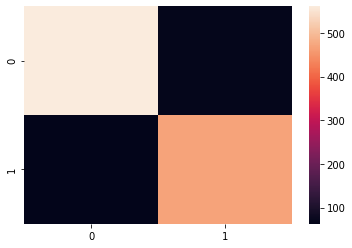

In [75]:
import seaborn as sns

sns.heatmap(y)

In [76]:
!pip install pydot
!pip install graphviz

In [77]:
from tensorflow.keras.utils import plot_model
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 80)           17951440  
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 86, 60)            72060     
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 60)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 61        
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 18,023,561
Trainable params: 18,023,561
Non-trainable params: 0
__________________________________________

In [78]:
import tensorflow as tf
filename='model121.h5'
tf.keras.models.save_model(model, filename)

In [79]:
model1 = keras.models.load_model('model121.h5')
print(model1)

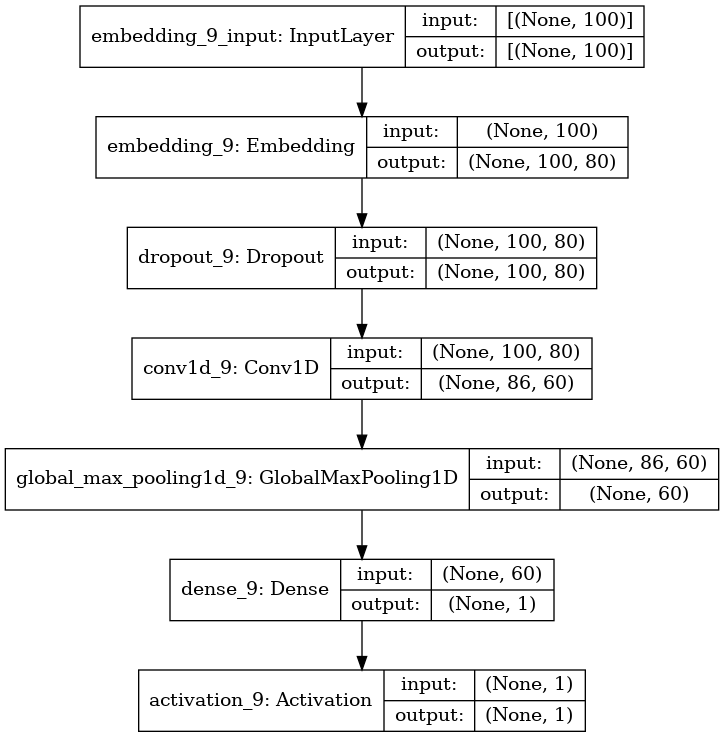

In [80]:
plot_model(model1, to_file='model121.png', show_shapes=True, show_layer_names=True)
#We implemnted this by running load model and plot model command in python console in terminal
#Since graphviz needs to be installed using sudo command